<a href="https://colab.research.google.com/github/DEVESHYA3/Bank-Marketing-Effectiveness-/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
#Importing Required  libraries
# Importing libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Filepath
Data=pd.read_csv('/content/drive/MyDrive/Almabetter/Cohort Denver/bank-full.csv',sep=';')
Dataset=Data.copy()

In [ ]:
#checking for the head()
Dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#checking for info
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
#checking for the shape of data
Dataset.shape

(45211, 17)

In [ ]:
#checking for the column
Dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# checking for the null values
Dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
#Checking For Unique Values
for column in Dataset.columns:
   print(column,Dataset[column].nunique())
   

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


In [ ]:
#Describe the data
Dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
Dataset.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


## Target Variables

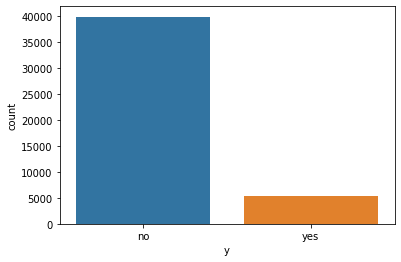

In [ ]:
#Visualising The Target Variable
g= sns.countplot(Dataset['y'])

As we can see the data is highly imbalance.

In [ ]:
#List Of Numeric Columns
numerical_columns=list(Dataset.select_dtypes(exclude=['object']))
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
#List Of Categorical Columns
categorical_columns=list(Dataset.select_dtypes(include=['object']))
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

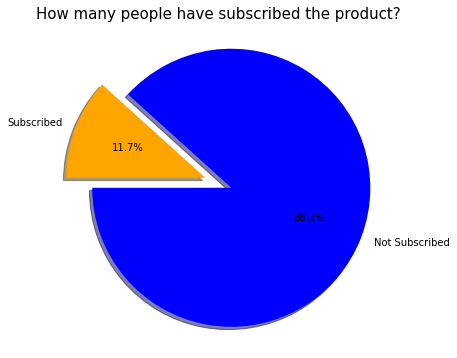

In [ ]:
#Visualising How Many Costumer Have Subscribed

labels='Not Subscribed','Subscribed'
sizes=Dataset.y.value_counts()
colors=['blue','orange']
explode=(0.2,0.0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=180)
plt.axis('equal')
plt.title('How many people have subscribed the product?',fontsize=15)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

## Bar graph representation of each Variables

Categorical Feature Exploration

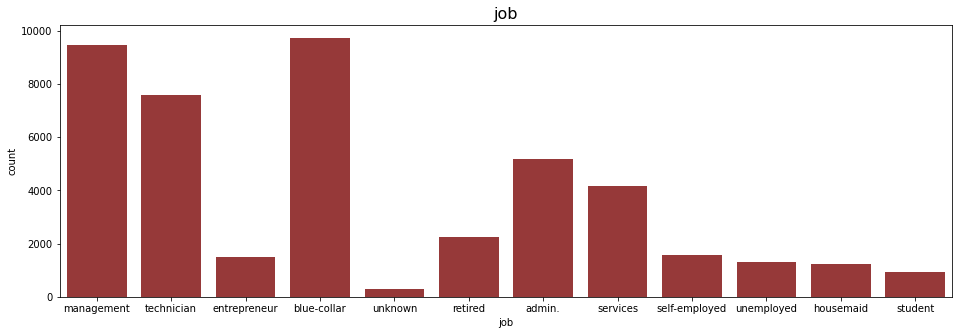

In [ ]:
# job
plt.figure(figsize=(16,5))
sns.countplot(Dataset['job'],color='brown')
plt.title('job',fontsize=16)
plt.show()

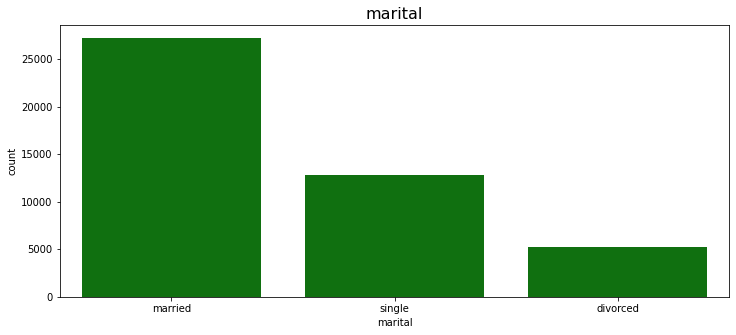

In [ ]:
# marital
plt.figure(figsize=(12,5))
sns.countplot(Dataset['marital'],color='green')
plt.title('marital',fontsize=16)
plt.show()

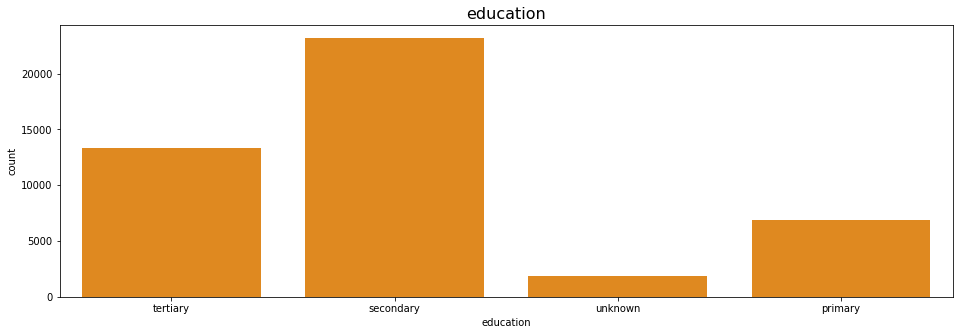

In [ ]:
 #Education
plt.figure(figsize=(16,5))
sns.countplot(Dataset['education'],color='DarkOrange')
plt.title('education',fontsize=16)
plt.show()

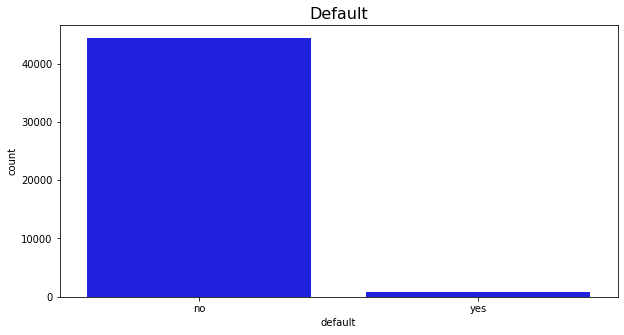

In [ ]:
# Default
plt.figure(figsize=(10,5))
sns.countplot(Dataset['default'],color='blue')
plt.title('Default',fontsize=16)
plt.show()

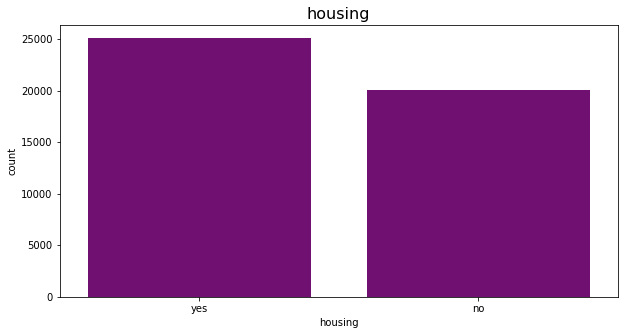

In [ ]:
# Housing
plt.figure(figsize = (10,5))
sns.countplot(Dataset['housing'], color = 'purple')
plt.title('housing', fontsize=16)
plt.show()

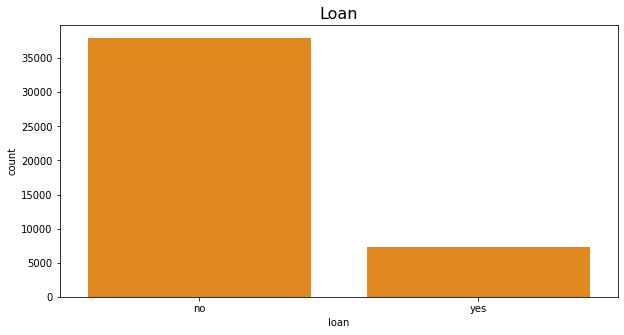

In [ ]:
# loan
plt.figure(figsize = (10,5))
sns.countplot(Dataset['loan'], color = 'DarkOrange')
plt.title('Loan', fontsize=16)
plt.show()

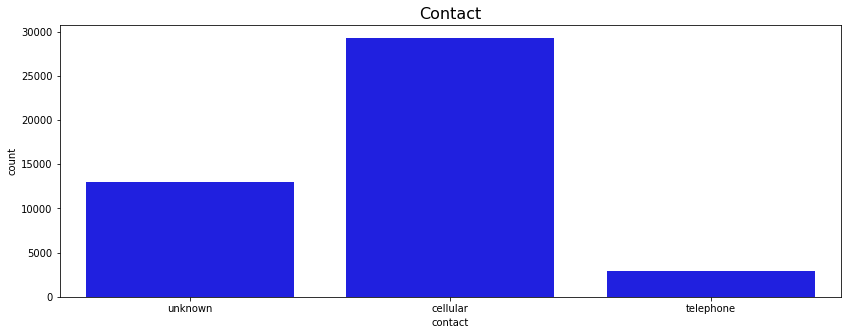

In [ ]:
# contact
plt.figure(figsize = (14,5))
sns.countplot(Dataset['contact'], color = 'blue')
plt.title('Contact', fontsize=16)
plt.show()


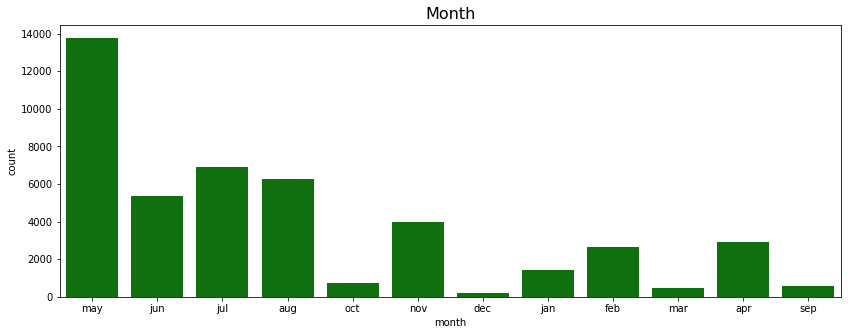

In [ ]:
# Month
plt.figure(figsize = (14,5))
sns.countplot(Dataset['month'], color = 'green')
plt.title('Month', fontsize=16)
plt.show()


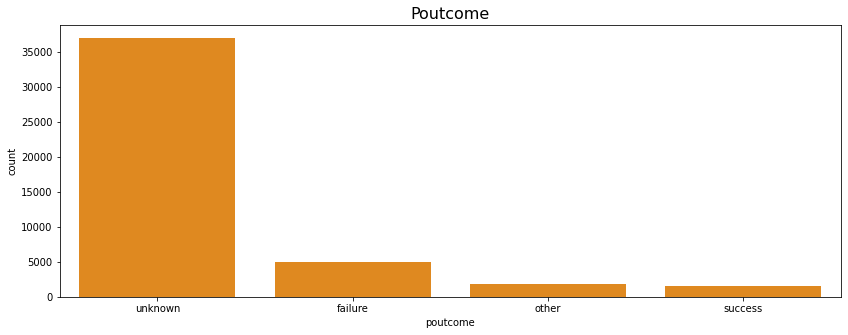

In [ ]:
# Poutcome
plt.figure(figsize = (14,5))
sns.countplot(Dataset['poutcome'], color = 'DarkOrange')
plt.title('Poutcome', fontsize=16)
plt.show()

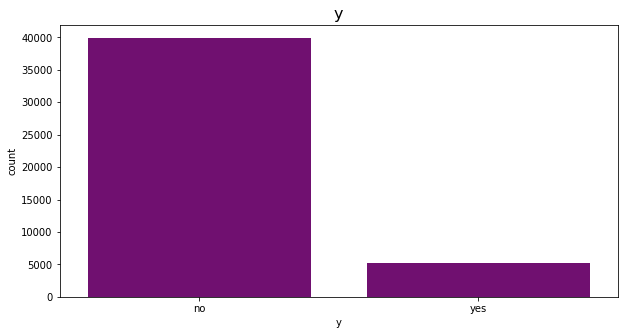

In [ ]:
# y
plt.figure(figsize = (10,5))
sns.countplot(Dataset['y'], color = 'purple')
plt.title('y', fontsize=16)
plt.show()

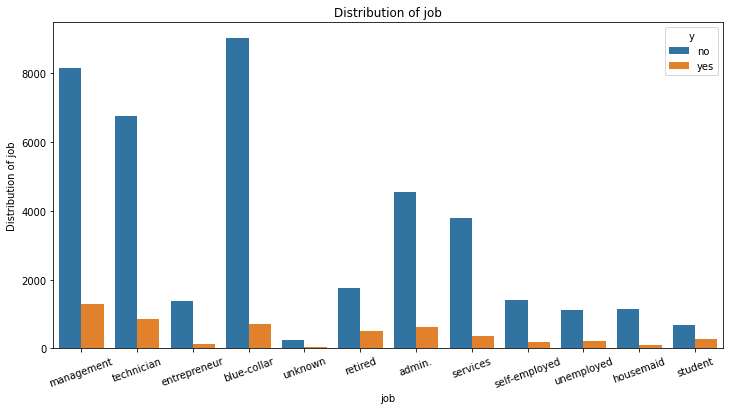

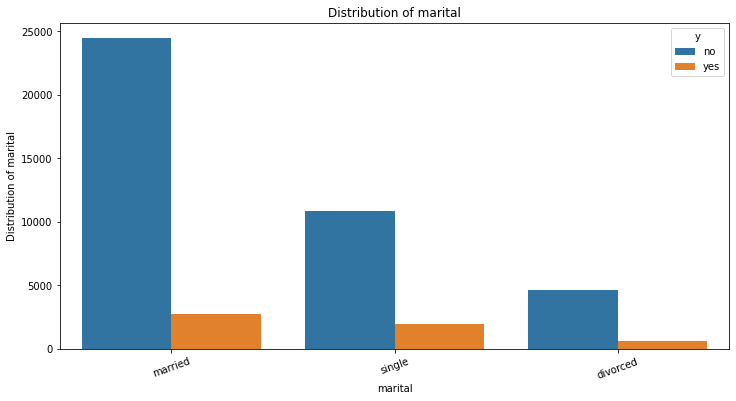

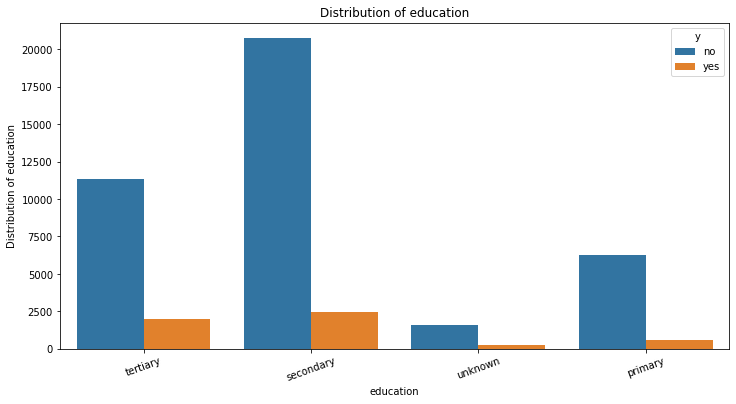

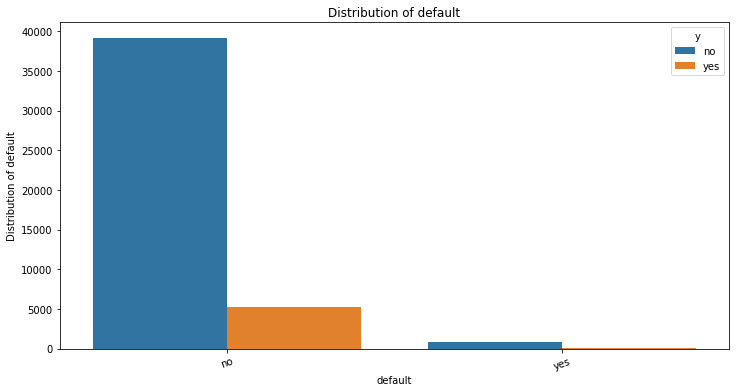

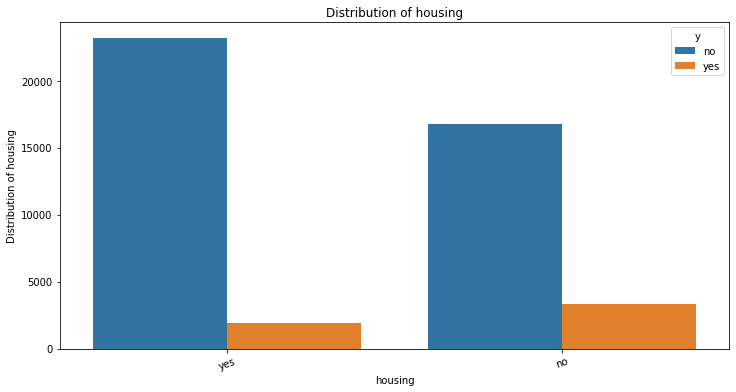

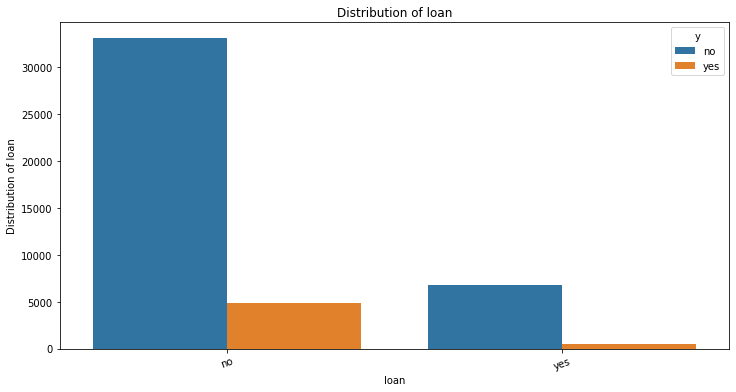

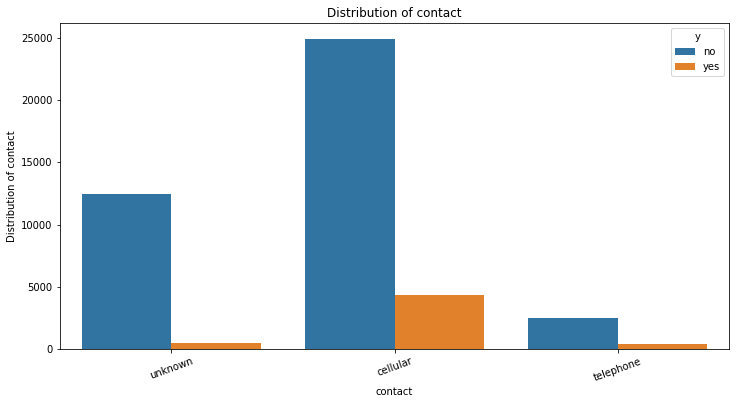

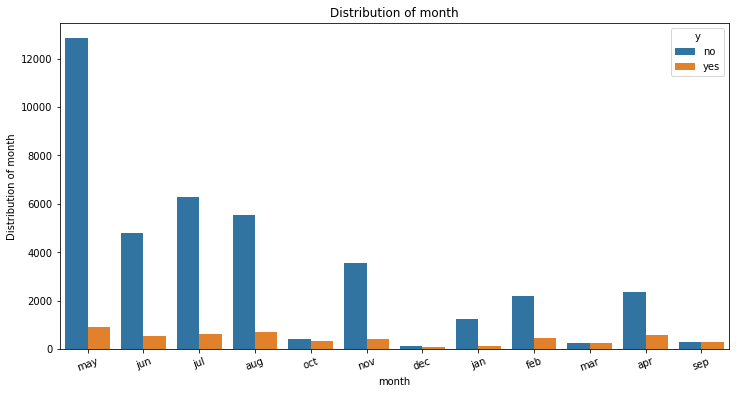

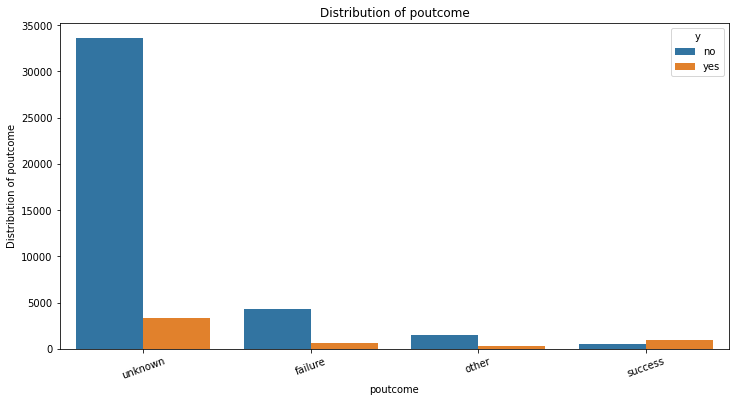

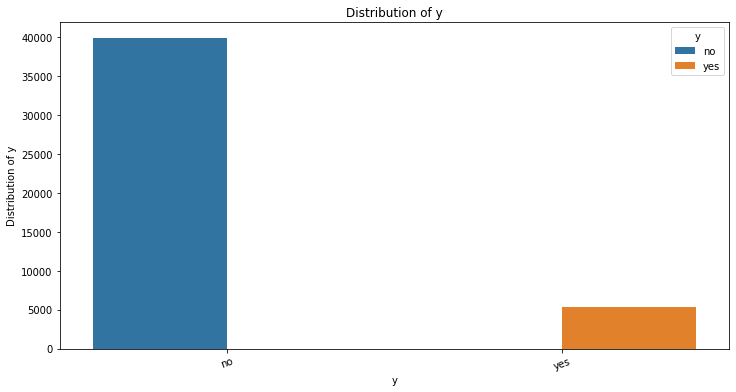

In [ ]:
# Countplot Of Categorical features
for col in categorical_columns:
  plt.figure(figsize=(12,6))
  sns.countplot(x=Dataset[col],hue=Dataset['y'])
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.ylabel('Distribution of {}'.format(col))
  plt.title('Distribution of {}'.format(col))
  plt.xticks(rotation=20)
  plt.show()

##Numerical columns exploration

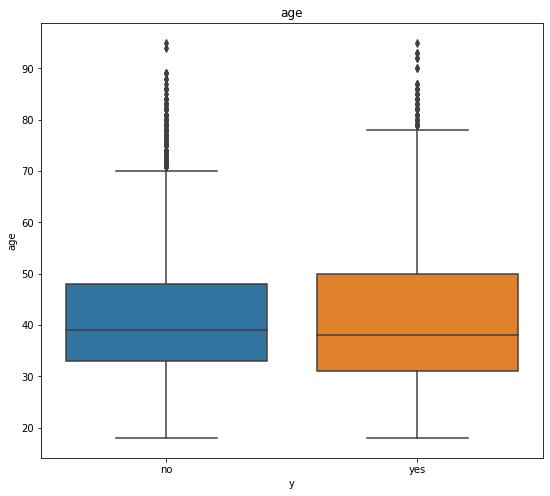

In [ ]:
# Relation between Continous numerical Features and Labels
# boxplot to show target distribution with respect numerical features
plt.figure(figsize=(9,8))
sns.boxplot(y=Dataset['age'],x=Dataset['y'])
plt.title('age')
plt.xlabel('y')
plt.show()

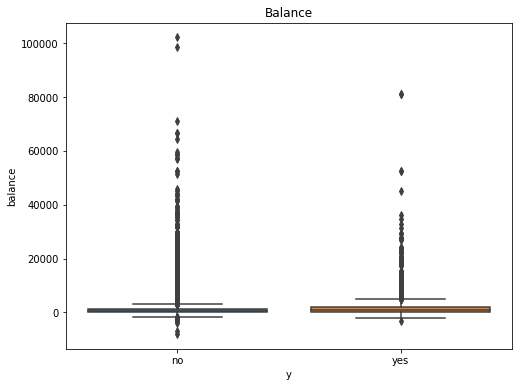

In [ ]:
# Balance
plt.figure(figsize=(8,6))
sns.boxplot(y=Dataset['balance'],x=Dataset['y'])
plt.title('Balance')
plt.xlabel('y')
plt.show()

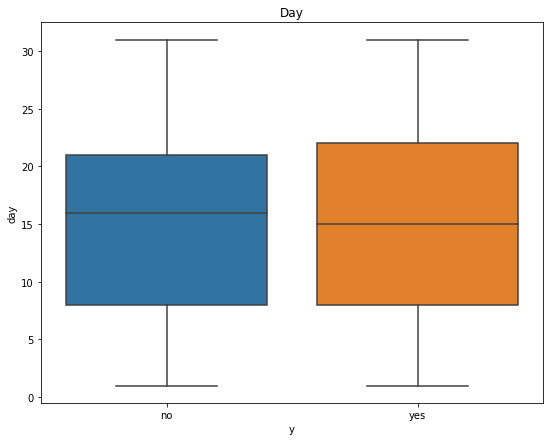

In [ ]:
# Day
plt.figure(figsize=(9,7))
sns.boxplot(y=Dataset['day'],x=Dataset['y'])
plt.title('Day')
plt.xlabel('y')
plt.show()

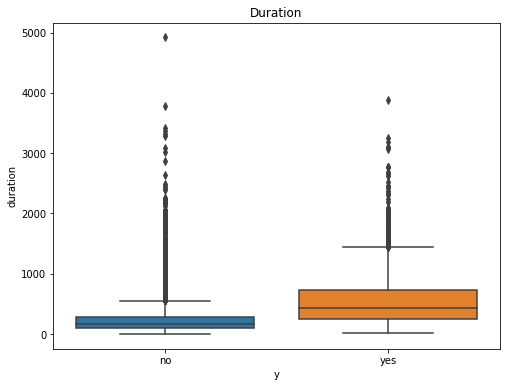

In [ ]:
# Duration
plt.figure(figsize=(8,6))
sns.boxplot(y=Dataset['duration'],x=Dataset['y'])
plt.title('Duration')
plt.xlabel('y')
plt.show()


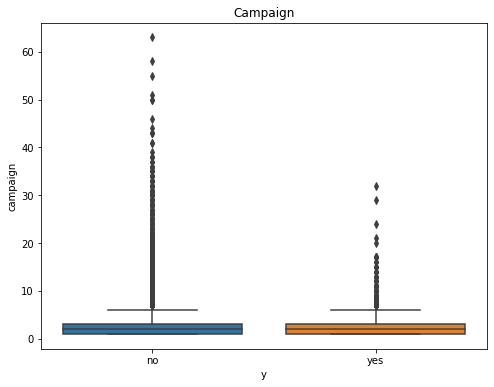

In [ ]:
# Campaign
plt.figure(figsize=(8,6))
sns.boxplot(y=Dataset['campaign'],x=Dataset['y'])
plt.title('Campaign')
plt.xlabel('y')
plt.show()

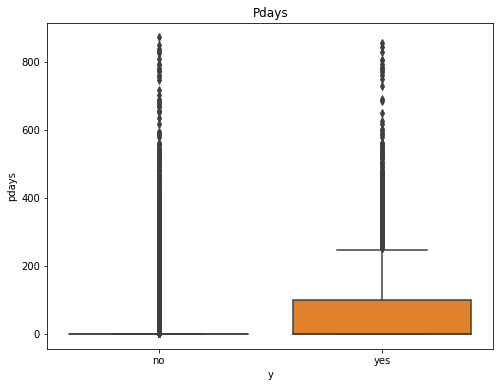

In [ ]:
# Pdays
plt.figure(figsize=(8,6))
sns.boxplot(y=Dataset['pdays'],x=Dataset['y'])
plt.title('Pdays')
plt.xlabel('y')
plt.show()


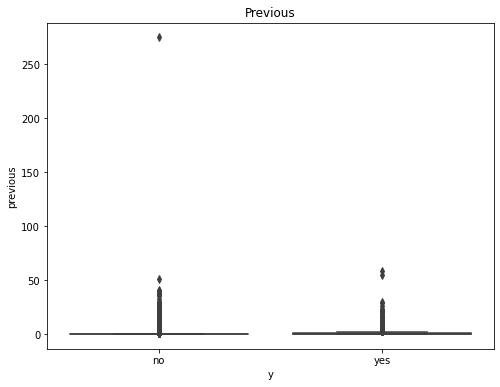

In [ ]:
# Previous
plt.figure(figsize=(8,6))
sns.boxplot(y=Dataset['previous'],x=Dataset['y'])
plt.title('Previous')
plt.xlabel('y')
plt.show()

 we can see that there are many Outliers in 'no' part as well as 'yes' Part but here our data is Imbalanced so we are keeping this Outliers

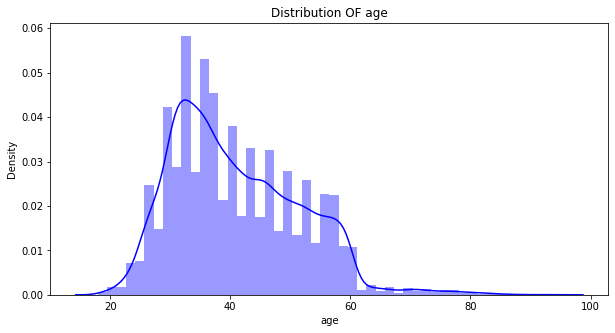

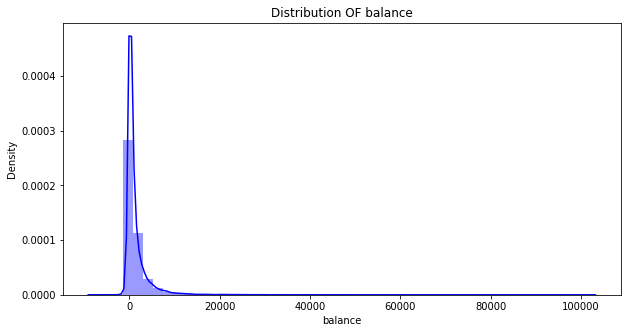

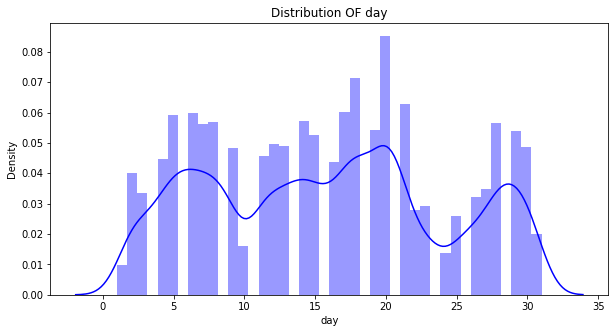

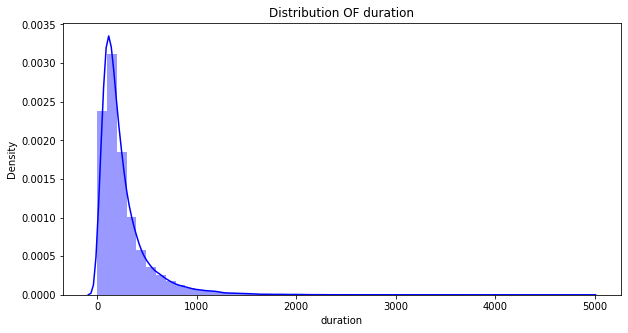

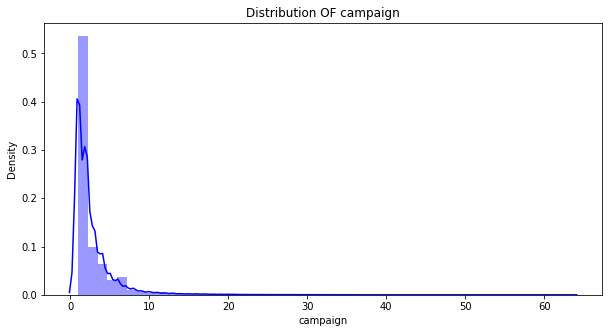

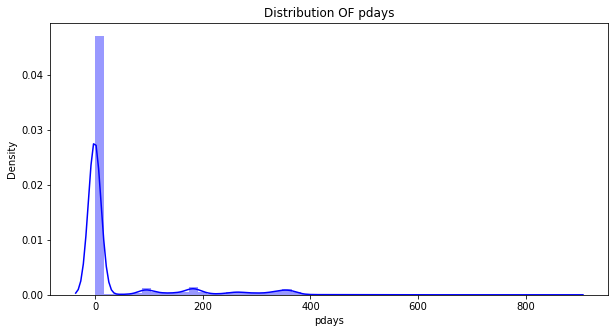

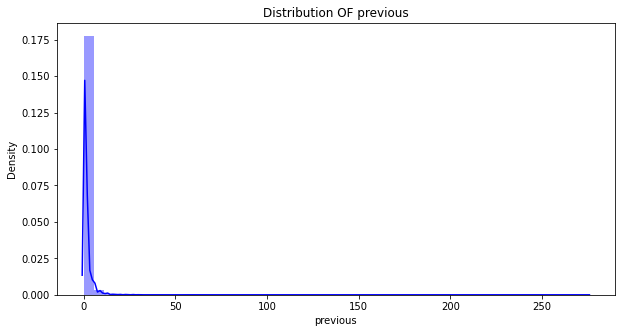

In [ ]:
# Plot a univariate distribution of continues observations
# Distribution Plot Of Numerical Features
for col in numerical_columns:
  plt.figure(figsize=(10,5))
  sns.distplot(Dataset[col], color='blue')
  plt.title('Distribution OF {}'.format(col))
  plt.show()

In [ ]:
# Correlation
Dataset.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


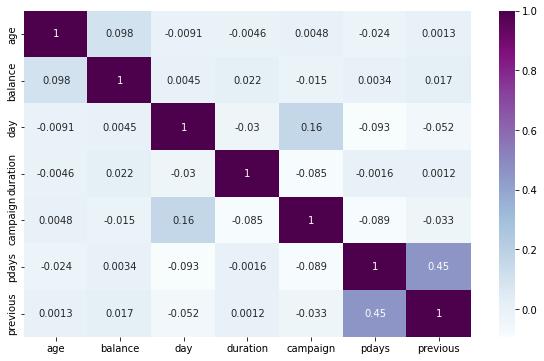

In [ ]:
#Heatmap
plt.subplots(figsize=(10,6))
sns.heatmap(Dataset.corr(),annot=True,cmap='BuPu')

In [ ]:
# Checking For Shape
Dataset.shape

(45211, 17)

In [ ]:
# Checking For Head
Dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Creating One-Hot Encodig For Non-numeric Martial Column

In [ ]:
marital_dummies=pd.get_dummies(Dataset['marital'],prefix='marital')
marital_dummies.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [ ]:
# Merge marital_dummies with marital column
pd.concat([Dataset['marital'],marital_dummies],axis=1).head()

,marital,marital_divorced,marital_married,marital_single
0,married,0,1,0
1,single,0,0,1
2,married,0,1,0
3,married,0,1,0
4,single,0,0,1


In [ ]:
# Remove marital_divorced Column
marital_dummies.drop('marital_divorced', axis =1, inplace = True)
marital_dummies.head()

,marital_married,marital_single
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [ ]:
# Merge marital_dummies into  main dataframe
Dataset=pd.concat([Dataset,marital_dummies],axis=1)
Dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,1


Creating One Hot Encoding For Job Column

In [ ]:
job_dummies=pd.get_dummies(Dataset['job'],prefix='job')
job_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
job_dummies.drop('job_admin.',axis=1,inplace=True)

In [ ]:
# Merge job_dummies into main dataframe
Dataset=pd.concat([Dataset,job_dummies],axis=1)
Dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


Creating One Hot Encoding Of Education Column

In [ ]:
education_dummies=pd.get_dummies(Dataset['education'],prefix='education')
education_dummies.head()

,education_primary,education_secondary,education_tertiary,education_unknown
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1


In [ ]:
education_dummies.drop('education_primary',axis=1,inplace=True)

In [ ]:
Dataset=pd.concat([Dataset,education_dummies],axis=1)
Dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,1,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1


Creating One Hot Encoding For Contact Column

In [ ]:
contact_dummies=pd.get_dummies(Dataset['contact'],prefix='contact')
contact_dummies.head()

,contact_cellular,contact_telephone,contact_unknown
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
contact_dummies.drop('contact_cellular',axis=1,inplace=True)

In [ ]:
Dataset=pd.concat([Dataset,contact_dummies],axis=1)
Dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_services,job_student,job_technician,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,1,0,0,1,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,1,0,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,1,0,0,1,0,1


Creating One Hot Encoding Of poutcome Column

In [ ]:
poutcome_dummies=pd.get_dummies(Dataset['poutcome'],prefix='poutcome')
poutcome_dummies.head()

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
poutcome_dummies.drop('poutcome_failure',axis=1,inplace=True)

In [ ]:
Dataset=pd.concat([Dataset,poutcome_dummies],axis=1)
Dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,1,0,0,1,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,1,0,0,0,1,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,1,0,0,0,1,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,1,0,1,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,1,0,0,1,0,1,0,0,1


Converting Month Column Into Numeric values

In [ ]:
months={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
Dataset['month']=Dataset['month'].map(months)
Dataset['month'].head()

0    5
1    5
2    5
3    5
4    5
Name: month, dtype: int64

In [ ]:
Dataset[Dataset['pdays']==-1]['pdays'].count()


36954

In [ ]:
Dataset['was_contacted']=Dataset['pdays'].apply(lambda row:0 if row==-1 else 1)
Dataset[['pdays','was_contacted']].head()

,pdays,was_contacted
0,-1,0
1,-1,0
2,-1,0
3,-1,0
4,-1,0


Convert Default Column Into Numeric Value

In [ ]:
Dataset['is_default']=Dataset['default'].apply(lambda row: 1 if row=='yes' else 0)

In [ ]:
#view default and is_default columns together
Dataset[['default','is_default']].tail()

,default,is_default
45206,no,0
45207,no,0
45208,no,0
45209,no,0
45210,no,0


Converting Housing Column Into Numeric Value

In [ ]:
Dataset['is_housing']=Dataset['housing'].apply(lambda row: 1if row=='yes' else 0)

In [ ]:
# View housing and is_housing columns together
Dataset[['housing','is_housing']].head()

,housing,is_housing
0,yes,1
1,yes,1
2,yes,1
3,yes,1
4,no,0


Converting loan column into numeric value

In [ ]:
Dataset['is_loan']=Dataset['loan'].apply(lambda row: 1 if row =='yes' else 0)

In [ ]:
#View loan and is_loan columns together
Dataset[['loan','is_loan']].head()

,loan,is_loan
0,no,0
1,no,0
2,yes,1
3,no,0
4,no,0


Convert Target Column 'y' Into Numeric Value

In [ ]:
Dataset['target']=Dataset['y'].apply(lambda row : 1 if row =='yes' else 0)


In [ ]:
#View y and target columns together
Dataset[['y','target']].head()

,y,target
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0


In [ ]:
Dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,was_contacted,is_default,is_housing,is_loan,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,1,0,0,1,0,0,1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,1,0,0,1,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,1,0,0,1,0,0,1,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,1,0,0,1,0,0,1,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,1,0,0,1,0,0,0,0,0


Delete job ,education , default , housing , loan , contact , month , pdays ,poutcome , y columns

In [ ]:
Dataset.drop(['job','education','marital','default','housing','loan','contact','poutcome','y','month','duration','age','day'],axis=1,inplace=True)

# View After Converting All Columns Into Numeric Column

In [ ]:
Dataset.dtypes

balance                int64
campaign               int64
pdays                  int64
previous               int64
marital_married        uint8
marital_single         uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
contact_telephone      uint8
contact_unknown        uint8
poutcome_other         uint8
poutcome_success       uint8
poutcome_unknown       uint8
was_contacted          int64
is_default             int64
is_housing             int64
is_loan                int64
target                 int64
dtype: object

In [ ]:
Dataset.shape

(45211, 30)

In [ ]:
# Remove the outlier using isolationForest Technique
from sklearn.ensemble import IsolationForest

In [ ]:
features = Dataset.drop(['target'],axis=1)

anomaly_filter = IsolationForest(contamination=0.1,n_jobs=-1)
anomalies = pd.Series(anomaly_filter.fit_predict(features))
Dataset['is_anomaly'] = anomalies
Dataset = Dataset[Dataset['is_anomaly']==1].drop(['is_anomaly'],axis=1)

In [ ]:
Dataset.shape

(40690, 30)

In [ ]:
# Assigning values to independent variables
X=Dataset.drop('target',axis=1)
X.head()

,balance,campaign,pdays,previous,marital_married,marital_single,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,was_contacted,is_default,is_housing,is_loan
0,2143,1,-1,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1,29,1,-1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,2,1,-1,0,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,1
3,1506,1,-1,0,1,0,1,0,0,0,...,1,0,1,0,0,1,0,0,1,0
4,1,1,-1,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0


In [ ]:
# Assigning the values of dependent variables
y=Dataset['target']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
# Over sampling the data using SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
sampler=SMOTE()
X,y=sampler.fit_resample(X.values,y.values)

# **SMOTE**

One approach to addressing imbalanced datasets is to oversample the minority class

In [ ]:
X.shape

(73534, 29)

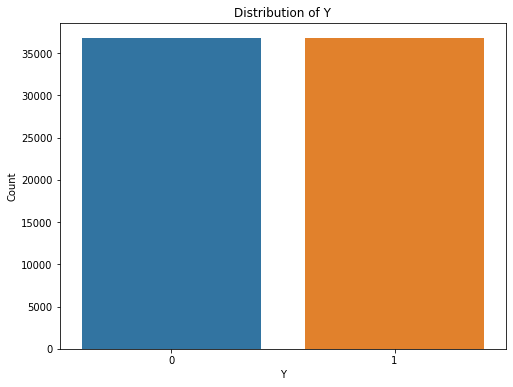

In [ ]:
# Countplot of department column y
plt.figure(figsize=(8,6))
sns.countplot(x=y)
plt.xlabel('Y')
plt.ylabel('Count')
plt.title('Distribution of Y')
plt.show()

# **Train-Test Split** 

In [ ]:
# Scale the data using Standard Scaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [ ]:
# Splitting the data into train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
print(X_train.shape)

(55150, 29)


In [ ]:
print(y_train.shape)

(55150,)


In [ ]:
print(X_test.shape)

(18384, 29)


In [ ]:
print(y_test.shape)

(18384,)


# **Models Implementation**

1.Logistic Regression

2.Decision Tree

3.XGBoost Classifier

4.K - Nearest Neighbors

# **Logistic Regression**

In [ ]:
# Fitting model to logistic regression
logistic_model=LogisticRegression(fit_intercept=True,max_iter=10000)
logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
#Get the model coefficients
logistic_model.coef_

array([[-0.00413338, -0.45848844, -0.06323465, -0.00214219, -0.79589395,
        -0.62017145, -0.94516747, -0.44341814, -0.53445442, -0.83189156,
        -0.46542188, -0.41885198, -0.59961625, -0.20651842, -0.77643863,
        -0.42642347, -0.20971758, -0.80841916, -0.52291719, -0.31847745,
        -0.23765238, -0.78233524, -0.06799866,  0.05124626, -1.27901318,
        -1.26310848, -0.11372574, -0.5370435 , -0.47479938]])

In [ ]:
#Get the model intercept
logistic_model.intercept_

array([0.10433647])

In [ ]:
#Get the predicted probabilities
train_preds=logistic_model.predict_proba(X_train)
test_preds=logistic_model.predict_proba(X_test)

In [ ]:
#Get the predicted classes
train_class_preds = logistic_model.predict(X_train)
test_class_preds = logistic_model.predict(X_test)

In [ ]:
#Get the accuracy scores
train_accuracy=accuracy_score(train_class_preds,y_train)
test_accuracy=accuracy_score(test_class_preds,y_test)

print(round((train_accuracy),4))
print(round((test_accuracy),4))

0.8665
0.864


In [ ]:
log_train_preds = logistic_model.predict_proba(X_train)[:,1]
log_test_preds = logistic_model.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_auc_score

print(round(roc_auc_score(y_train,log_train_preds), 4))
print(round(roc_auc_score(y_test,log_test_preds), 4))

0.934
0.9342


In [ ]:
from sklearn.metrics import classification_report
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.89      0.85      0.87     29045
          no       0.84      0.89      0.86     26105

    accuracy                           0.87     55150
   macro avg       0.87      0.87      0.87     55150
weighted avg       0.87      0.87      0.87     55150



              precision    recall  f1-score   support

         yes       0.89      0.85      0.87      9650
          no       0.84      0.88      0.86      8734

    accuracy                           0.86     18384
   macro avg       0.86      0.86      0.86     18384
weighted avg       0.87      0.86      0.86     18384



In [ ]:
# Hyperparameter tuning using GridSearchCv
logistic_grid = LogisticRegression()
parameters = {'C': [1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,10,100,1e-3,1e+4,1e+5,1e+6]}
log_grid = GridSearchCV(logistic_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
log_grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ............................................C=1e-05; total time=   0.1s
[CV] END ............................................C=1e-05; total time=   0.1s
[CV] END ............................................C=1e-05; total time=   0.1s
[CV] END ............................................C=1e-05; total time=   0.1s
[CV] END ............................................C=1e-05; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ...........................................C=0.0001; total time=   0.1s
[CV] END ............................................C=0.001; total time=   0.2s
[CV] END .......................................

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4, 5,
                               10, 100, 0.001, 10000.0, 100000.0, 1000000.0]},
             scoring='roc_auc', verbose=2)

In [ ]:
log_optimal_model = log_grid.best_estimator_

In [ ]:
# Making prediction on train and test data
train_class_preds = log_optimal_model.predict(X_train)
test_class_preds = log_optimal_model.predict(X_test)

In [ ]:
# Calculating accuracy of train and test 
log_train_accuracy = accuracy_score(y_train,train_class_preds)
log_test_accuracy = accuracy_score(y_test,test_class_preds)

print(round((log_train_accuracy),4))
print(round((log_test_accuracy), 4))

0.8665
0.864


In [ ]:
log_optimal_train_preds = log_optimal_model.predict_proba(X_train)[:,1]
log_optimal_test_preds = log_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
print(round((roc_auc_score(y_train,log_optimal_train_preds)), 4))
print(round((roc_auc_score(y_test,log_optimal_test_preds)), 4))

0.934
0.9342


In [ ]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.89      0.85      0.87     29045
          no       0.84      0.89      0.86     26105

    accuracy                           0.87     55150
   macro avg       0.87      0.87      0.87     55150
weighted avg       0.87      0.87      0.87     55150



              precision    recall  f1-score   support

         yes       0.89      0.85      0.87      9650
          no       0.84      0.88      0.86      8734

    accuracy                           0.86     18384
   macro avg       0.86      0.86      0.86     18384
weighted avg       0.87      0.86      0.86     18384



# **Decision Tree**

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Get the predicted classes
train_class_preds = tree_model.predict(X_train)
test_class_preds = tree_model.predict(X_test)

In [ ]:
#Get the accuracy score
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print(round((train_accuracy), 4))
print(round((test_accuracy), 4))

0.9912
0.8822


In [ ]:
tree_train_preds = tree_model.predict_proba(X_train)[:,1]
tree_test_preds = tree_model.predict_proba(X_test)[:,1]

In [ ]:
print(round((roc_auc_score(y_train,tree_train_preds)), 4))
print(round((roc_auc_score(y_test,tree_test_preds)), 4))

0.9998
0.8874


In [ ]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.99      0.99      0.99     27606
          no       0.99      0.99      0.99     27544

    accuracy                           0.99     55150
   macro avg       0.99      0.99      0.99     55150
weighted avg       0.99      0.99      0.99     55150



              precision    recall  f1-score   support

         yes       0.87      0.89      0.88      8891
          no       0.90      0.87      0.88      9493

    accuracy                           0.88     18384
   macro avg       0.88      0.88      0.88     18384
weighted avg       0.88      0.88      0.88     18384



In [ ]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
tree_grid = DecisionTreeClassifier()
parameters = {
                'max_depth' : [4,6,8,10],
              'min_samples_split' : [10,20,30,40,50],
              'min_samples_leaf' : [10,15,20]

}
tree_grid = GridSearchCV(tree_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
tree_grid.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=30; total time=   0.1s
[CV] END max_d

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [10, 20, 30, 40, 50]},
             scoring='roc_auc', verbose=2)

In [ ]:
tree_optimal_model = tree_grid.best_estimator_

In [ ]:
# Making prediction on train and test data
train_class_preds = tree_optimal_model.predict(X_train)
test_class_preds = tree_optimal_model.predict(X_test)

In [ ]:
# Calculating accuracy of train and test data  
tree_train_accuracy = accuracy_score(y_train,train_class_preds)
tree_test_accuracy = accuracy_score(y_test,test_class_preds)

print(round((tree_train_accuracy),4))
print(round((tree_test_accuracy), 4))

0.8478
0.8375


In [ ]:
tree_optimal_train_preds = tree_optimal_model.predict_proba(X_train)[:,1]
tree_optimal_test_preds = tree_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
print(round((roc_auc_score(y_train,tree_optimal_train_preds)), 4))
print(round((roc_auc_score(y_test,tree_optimal_test_preds)), 4))

0.9274
0.9127


In [ ]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.83      0.86      0.85     26688
          no       0.86      0.84      0.85     28462

    accuracy                           0.85     55150
   macro avg       0.85      0.85      0.85     55150
weighted avg       0.85      0.85      0.85     55150



              precision    recall  f1-score   support

         yes       0.82      0.85      0.83      8864
          no       0.85      0.83      0.84      9520

    accuracy                           0.84     18384
   macro avg       0.84      0.84      0.84     18384
weighted avg       0.84      0.84      0.84     18384



In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [ ]:
features.columns

Index(['balance', 'campaign', 'pdays', 'previous', 'marital_married',
       'marital_single', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_telephone', 'contact_unknown',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'was_contacted', 'is_default', 'is_housing', 'is_loan'],
      dtype='object')

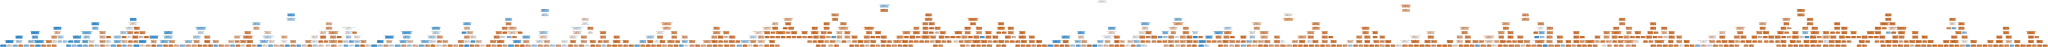

<Figure size 144x144 with 0 Axes>

In [ ]:
plt.figure(figsize=(2,2))
graph = Source(tree.export_graphviz(tree_optimal_model, out_file=None, feature_names=features.columns,filled= True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
importances = tree_optimal_model.feature_importances_

importance_dict_gb = {'Feature' : list(features.columns),
                   'Feature Importance' : importances}

importance_gb_df = pd.DataFrame(importance_dict_gb)
importance_gb_df['Feature Importance'] = round(importance_gb_df['Feature Importance'],2)
fim_gb_df = importance_gb_df.sort_values(by=['Feature Importance'],ascending=False)
fim_gb_df

,Feature,Feature Importance
27,is_housing,0.27
21,contact_unknown,0.15
5,marital_single,0.10
4,marital_married,0.09
1,campaign,0.06
0,balance,0.05
14,job_technician,0.04
28,is_loan,0.04
6,job_blue-collar,0.04
17,education_secondary,0.03


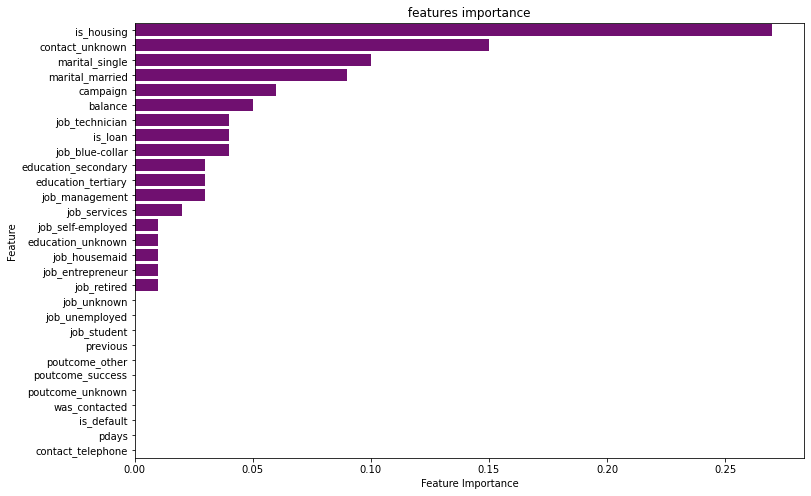

In [ ]:
plt.figure(figsize=(12,8))
plt.title(' features importance ')
sns.barplot(x='Feature Importance', y="Feature", color = 'purple', data=fim_gb_df)
plt.show()

## XGBoost Classifier

In [ ]:
import xgboost as xgb

In [ ]:
XGBoost_model = xgb.XGBClassifier()
XGBoost_model.fit(X_train, y_train)

XGBClassifier()

In [ ]:
# Get the predicted classes
train_class_preds = XGBoost_model.predict(X_train)
test_class_preds = XGBoost_model.predict(X_test)

In [ ]:
# Get the accuracy of classes
train_accuracy = accuracy_score(train_class_preds, y_train)
test_accuracy = accuracy_score(test_class_preds, y_test)

In [ ]:
print(round((train_accuracy), 4))

0.8694


In [ ]:
print(round((test_accuracy), 4))

0.8661


In [ ]:
XGBoost_train_preds =  XGBoost_model.predict_proba(X_train)[:, 1]
XGBoost_test_preds =  XGBoost_model.predict_proba(X_test)[:, 1]

In [ ]:
print(round((roc_auc_score(y_train,XGBoost_train_preds )), 4))

0.9361


In [ ]:
print(round((roc_auc_score(y_test,XGBoost_test_preds )), 4))

0.935


In [ ]:
target_names = ['yes', 'no']
print(classification_report(train_class_preds, y_train, target_names= target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names= target_names))

              precision    recall  f1-score   support

         yes       0.89      0.86      0.87     28534
          no       0.85      0.88      0.87     26616

    accuracy                           0.87     55150
   macro avg       0.87      0.87      0.87     55150
weighted avg       0.87      0.87      0.87     55150



              precision    recall  f1-score   support

         yes       0.88      0.85      0.87      9456
          no       0.85      0.88      0.86      8928

    accuracy                           0.87     18384
   macro avg       0.87      0.87      0.87     18384
weighted avg       0.87      0.87      0.87     18384



# Hyperparameter Tuning

In [ ]:
# Hyperparameter Tuning using GridSearchCV
XGBoost_grid = xgb.XGBClassifier()
parameters = {
                'n_estimators' : [50,80,100,125],
              'max_depth' : [3,5,7,9],
              'learning_rate': [0.01,0.1,0.3,0.5]
              }
XGBoost_grid = GridSearchCV(XGBoost_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
XGBoost_grid.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.9s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.9s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.9s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.9s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.9s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   3.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   3.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   3.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   2.9s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=80; total time=   2.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   3.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 80, 100, 125]},
             scoring='roc_auc', verbose=2)

In [ ]:
XGBoost_optimal_model =XGBoost_grid.best_estimator_

In [ ]:
# Making prediction on train and test data
train_class_preds = XGBoost_optimal_model.predict(X_train)
test_class_preds = XGBoost_optimal_model.predict(X_test)

In [ ]:
# Calculating accuracy on train and test data
XGBoost_train_accuracy = accuracy_score(y_train,train_class_preds)
XGBoost_test_accuracy = accuracy_score(y_test,test_class_preds)

In [ ]:
print(round((XGBoost_train_accuracy), 4))
print(round((XGBoost_test_accuracy), 4))

0.9532
0.91


In [ ]:
XGBoost_optimal_train_preds = XGBoost_optimal_model.predict_proba(X_train)[:, 1]
XGBoost_optimal_test_preds = XGBoost_optimal_model.predict_proba(X_test)[:, 1]

In [ ]:
target_names = ['yes', 'no']
print(classification_report( train_class_preds, y_train, target_names = target_names))
print('\n')
print(classification_report( test_class_preds, y_test, target_names = target_names))

              precision    recall  f1-score   support

         yes       0.96      0.94      0.95     28139
          no       0.94      0.96      0.95     27011

    accuracy                           0.95     55150
   macro avg       0.95      0.95      0.95     55150
weighted avg       0.95      0.95      0.95     55150



              precision    recall  f1-score   support

         yes       0.92      0.90      0.91      9406
          no       0.90      0.92      0.91      8978

    accuracy                           0.91     18384
   macro avg       0.91      0.91      0.91     18384
weighted avg       0.91      0.91      0.91     18384



In [ ]:
importances = XGBoost_optimal_model.feature_importances_

importance_dict_gb = {'Feature' : list(features.columns),
                   'Feature Importance' : importances}

importance_gb_df = pd.DataFrame(importance_dict_gb)
importance_gb_df['Feature Importance'] = round(importance_gb_df['Feature Importance'],2)
fim_gb_df = importance_gb_df.sort_values(by=['Feature Importance'],ascending=False)
fim_gb_df

,Feature,Feature Importance
21,contact_unknown,0.13
8,job_housemaid,0.09
15,job_unemployed,0.08
27,is_housing,0.06
28,is_loan,0.05
19,education_unknown,0.05
7,job_entrepreneur,0.05
10,job_retired,0.05
11,job_self-employed,0.05
20,contact_telephone,0.04


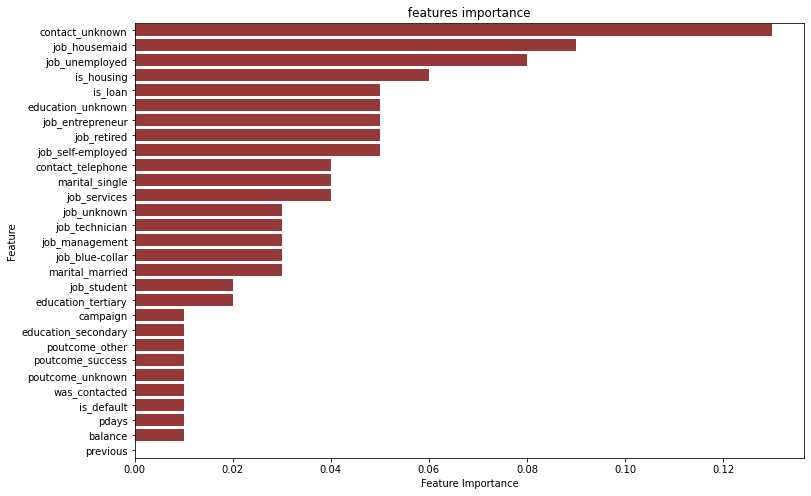

In [ ]:
plt.figure(figsize=(12,8))
plt.title(' features importance ')
sns.barplot(x='Feature Importance',y="Feature", color = 'brown', data=fim_gb_df)

# K-Nearest Neighbors (KNN)

K-Nearest Neighbours is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.

In [ ]:
# Setup KNN classifier with k neighbors
KNN_model = KNeighborsClassifier(n_neighbors=3)

# Fit the model
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
train_class_preds = KNN_model.predict(X_train)
test_class_preds = KNN_model.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

In [ ]:
print(round((train_accuracy),4))
print(round((test_accuracy),4))

0.9272
0.8836


In [ ]:
KNN_train_preds = KNN_model.predict_proba(X_train)[:,1]
KNN_test_preds = KNN_model.predict_proba(X_test)[:,1]

In [ ]:
print(round((roc_auc_score(y_train,KNN_train_preds)), 4))
print(round((roc_auc_score(y_test,KNN_test_preds)), 4))

0.9842
0.9256


In [ ]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print('\n')
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.93      0.92      0.93     27935
          no       0.92      0.93      0.93     27215

    accuracy                           0.93     55150
   macro avg       0.93      0.93      0.93     55150
weighted avg       0.93      0.93      0.93     55150



              precision    recall  f1-score   support

         yes       0.89      0.88      0.88      9209
          no       0.88      0.89      0.88      9175

    accuracy                           0.88     18384
   macro avg       0.88      0.88      0.88     18384
weighted avg       0.88      0.88      0.88     18384



## Hyperparameter Tuning

In [ ]:
# Hyperparameter  Tunning using GridSearchCV
KNN_grid = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,50,2)}
KNN_grid = GridSearchCV(KNN_grid, parameters, scoring='roc_auc', cv=5,verbose=2)
KNN_grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ......................................n_neighbors=1; total time=   4.5s
[CV] END ......................................n_neighbors=1; total time=   4.5s
[CV] END ......................................n_neighbors=1; total time=   4.5s
[CV] END ......................................n_neighbors=1; total time=   4.5s
[CV] END ......................................n_neighbors=1; total time=   4.5s
[CV] END ......................................n_neighbors=3; total time=   6.2s
[CV] END ......................................n_neighbors=3; total time=   6.2s
[CV] END ......................................n_neighbors=3; total time=   6.2s
[CV] END ......................................n_neighbors=3; total time=   6.3s
[CV] END ......................................n_neighbors=3; total time=   6.2s
[CV] END ......................................n_neighbors=5; total time=  10.3s
[CV] END ......................................

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])},
             scoring='roc_auc', verbose=2)

In [ ]:
KNN_grid.best_estimator_

KNeighborsClassifier(n_neighbors=23)

In [ ]:
KNN_optimal_model = KNN_grid.best_estimator_

In [ ]:
# Making predcition on train and test data
train_class_preds = KNN_optimal_model.predict(X_train)
test_class_preds = KNN_optimal_model.predict(X_test)

In [ ]:
# Calculating accuracy of train and test data
KNN_train_accuracy = accuracy_score(y_train,train_class_preds)
KNN_test_accuracy = accuracy_score(y_test,test_class_preds)

In [ ]:
print(round((KNN_train_accuracy), 4))
print(round((KNN_test_accuracy), 4))

0.8819
0.8709


In [ ]:
KNN_optimal_train_preds = KNN_optimal_model.predict_proba(X_train)[:,1]
KNN_optimal_test_preds = KNN_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
print(round((roc_auc_score(y_train,KNN_optimal_train_preds)), 4))
print(round((roc_auc_score(y_test,KNN_optimal_test_preds)), 4))

0.9525
0.9396


In [ ]:
target_names = ['yes','no']
print(classification_report(train_class_preds, y_train, target_names=target_names))
print(classification_report(test_class_preds, y_test, target_names=target_names))

              precision    recall  f1-score   support

         yes       0.91      0.86      0.89     29105
          no       0.85      0.90      0.88     26045

    accuracy                           0.88     55150
   macro avg       0.88      0.88      0.88     55150
weighted avg       0.88      0.88      0.88     55150

              precision    recall  f1-score   support

         yes       0.90      0.85      0.87      9730
          no       0.84      0.90      0.87      8654

    accuracy                           0.87     18384
   macro avg       0.87      0.87      0.87     18384
weighted avg       0.87      0.87      0.87     18384



## CONCLUSION


1) For age , most of the customers are in the age range of 30-40.

2) For balance , above 1000$ is like to subscribe a term deposite .

3) The model can help to classify the customers on the basis on which they deposit or not.

4)The model helps to target the right customer rather than wasting time on wrong customer.

5) Comparing to all algorithms XGboost algorithm has best accuracy score and ROC-AUC score . So it is concluded as optimal model.